<a href="https://colab.research.google.com/github/Blackman9t/Machine_Learning/blob/master/loan_default_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="6">Classification with Python</font></h1>

In this notebook we try to classify bank customers into defaulters or non-defaulters using a bunch of classifier algorithms.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

The data set we shall use is from Credit One Bank and it's in Kaggle and can be  seen along side its data dictionary via this [link](https://www.kaggle.com/dataforyou/bankloan)<br>

The raw file can be read straight from github via this [link](https://github.com/Blackman9t/Machine_Learning/blob/master/Loan_Data%20for%20Classification.xlsx?raw=true')

In [0]:
data = 'https://github.com/Blackman9t/Machine_Learning/blob/master/Loan_Data%20for%20Classification.xlsx?raw=true'

Reading the raw file to a data frame and setting row 2 as the header, since I first viewed the file in excel.<br>

Let's define additional NaN values that pandas may not see

In [0]:
additional_nan_values = ['n/a', '--','?','None','Non','non','none']

In [26]:
loan_df = pd.read_excel(data, header=2, na_values=additional_nan_values)

loan_df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1,1


Let's check the shape

In [27]:
loan_df.shape

(5000, 23)

Shape is 5000 rows and 23 columns. <br>Pay attention to the data, it has  a lot of alpha-numeric notations<br>The best bet is to open the data dictionary via this [link](https://www.kaggle.com/dataforyou/bankloan) to a browser so one can understand what each notation stands for.

>>

Let's check the info and dtypes

In [28]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Customer_ID                    5000 non-null int64
Status_Checking_Acc            5000 non-null object
Duration_in_Months             5000 non-null int64
Credit_History                 5000 non-null object
Purposre_Credit_Taken          5000 non-null object
Credit_Amount                  5000 non-null int64
Savings_Acc                    5000 non-null object
Years_At_Present_Employment    5000 non-null object
Inst_Rt_Income                 5000 non-null int64
Marital_Status_Gender          5000 non-null object
Other_Debtors_Guarantors       5000 non-null object
Current_Address_Yrs            5000 non-null int64
Property                       5000 non-null object
Age                            5000 non-null int64
Other_Inst_Plans               5000 non-null object
Housing                        5000 non-null object
Num_CC                         5000 non-null int64
Job             

Let's check the stats for columns of object dtype and transpose it for readability

In [29]:
loan_df.describe(include=['object']).T

,count,unique,top,freq
Status_Checking_Acc,5000,4,A14,1970
Credit_History,5000,5,A32,2650
Purposre_Credit_Taken,5000,10,A43,1400
Savings_Acc,5000,5,A61,3015
Years_At_Present_Employment,5000,5,A73,1695
Marital_Status_Gender,5000,4,A93,2740
Other_Debtors_Guarantors,5000,3,A101,4535
Property,5000,4,A123,1660
Other_Inst_Plans,5000,3,A143,4070
Housing,5000,3,A152,3565


Now Let's check the stats for numeric  columns  and transpose it for readability

In [30]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,5000.0,102500.500,1443.520003,100001.0,101250.75,102500.5,103750.25,105000.0
Duration_in_Months,5000.0,20.903,12.053989,4.0,12.00,18.0,24.00,72.0
Credit_Amount,5000.0,3271.258,2821.607329,250.0,1365.50,2319.5,3972.25,18424.0
Inst_Rt_Income,5000.0,2.973,1.118267,1.0,2.00,3.0,4.00,4.0
Current_Address_Yrs,5000.0,2.845,1.103276,1.0,2.00,3.0,4.00,4.0
Age,5000.0,35.546,11.370917,19.0,27.00,33.0,42.00,75.0
Num_CC,5000.0,1.407,0.577423,1.0,1.00,1.0,2.00,4.0
Dependents,5000.0,1.155,0.361941,1.0,1.00,1.0,1.00,2.0
Default_On_Payment,5000.0,0.299,0.457866,0.0,0.00,0.0,1.00,1.0
Count,5000.0,1.000,0.000000,1.0,1.00,1.0,1.00,1.0


No missing values atall  as both numeric and object dtype columns have complete 5000 records, but let's just confirm

In [31]:
loan_df.isna().any().all()  # checking if any missing values and checking if any true value in the response

False

For a data set of 5000 rows and 23 columns, we may need to reduce it's memory consumption as we know pandas stores all floats as float64 and all int as int64 let's reduce some columns to int8 or int16, especially columns with single or double digit entries like Age

In [32]:
loan_df.dtypes

Customer_ID                     int64
Status_Checking_Acc            object
Duration_in_Months              int64
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                   int64
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                  int64
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Property                       object
Age                             int64
Other_Inst_Plans               object
Housing                        object
Num_CC                          int64
Job                            object
Dependents                      int64
Telephone                      object
Foreign_Worker                 object
Default_On_Payment              int64
Count                           int64
dtype: object

In [33]:
current_memory = loan_df.memory_usage().sum()
print('Current memory is-', current_memory,'Bytes.')

loan_df.memory_usage()

Current memory is- 920080 Bytes.


Index                             80
Customer_ID                    40000
Status_Checking_Acc            40000
Duration_in_Months             40000
Credit_History                 40000
Purposre_Credit_Taken          40000
Credit_Amount                  40000
Savings_Acc                    40000
Years_At_Present_Employment    40000
Inst_Rt_Income                 40000
Marital_Status_Gender          40000
Other_Debtors_Guarantors       40000
Current_Address_Yrs            40000
Property                       40000
Age                            40000
Other_Inst_Plans               40000
Housing                        40000
Num_CC                         40000
Job                            40000
Dependents                     40000
Telephone                      40000
Foreign_Worker                 40000
Default_On_Payment             40000
Count                          40000
dtype: int64

In [34]:
# let's change all these columns with a max of 2 digits to int8 to save memory

loan_df[['Duration_in_Months','Inst_Rt_Income','Current_Address_Yrs','Age','Num_CC','Dependents','Default_On_Payment','Count']] = \
loan_df[['Duration_in_Months','Inst_Rt_Income','Current_Address_Yrs','Age','Num_CC','Dependents','Default_On_Payment','Count']].astype('int8', inplace=True)

# Let's change the two other columns with up to 6 digit numbers from int64 to int32 to save memory

loan_df[['Customer_ID','Credit_Amount']] = loan_df[['Customer_ID','Credit_Amount']].astype('int32')

new_memory = loan_df.memory_usage().sum()
print('New memory is-', new_memory,'Bytes.')

loan_df.memory_usage()

New memory is- 600080 Bytes.


Index                             80
Customer_ID                    20000
Status_Checking_Acc            40000
Duration_in_Months              5000
Credit_History                 40000
Purposre_Credit_Taken          40000
Credit_Amount                  20000
Savings_Acc                    40000
Years_At_Present_Employment    40000
Inst_Rt_Income                  5000
Marital_Status_Gender          40000
Other_Debtors_Guarantors       40000
Current_Address_Yrs             5000
Property                       40000
Age                             5000
Other_Inst_Plans               40000
Housing                        40000
Num_CC                          5000
Job                            40000
Dependents                      5000
Telephone                      40000
Foreign_Worker                 40000
Default_On_Payment              5000
Count                           5000
dtype: int64

Let's see how much memory we have saved

In [35]:
current_memory - new_memory  # We've saved 320,000 Bytes just now.

320000

Next we need to organise the Data into a more logical sequence before we start any computation.<br>
This means we arrange columns of similar meta-data together starting with categorical, then continuous columns.<br>
Except in case where it is more sensible to put a continuous variable before a categorical one.

In [36]:
# Let's see the total columns in the data set

loan_df.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

Next, let's try to group them into subgroups using python lists. 
<br>
For exanmple we can have a list for bio-data, one for financial date and so on

In [0]:
customer_data = ['Customer_ID', 'Marital_Status_Gender', 'Age', 'Dependents', 'Housing','Telephone', 'Property','Current_Address_Yrs']

job_and_personal_finance = ['Job', 'Foreign_Worker', 'Years_At_Present_Employment', 'Savings_Acc','Status_Checking_Acc', 'Credit_History']

loan_credit_data = ['Credit_Amount', 'Purposre_Credit_Taken', 'Duration_in_Months','Inst_Rt_Income','Other_Debtors_Guarantors','Other_Inst_Plans ','Num_CC','Default_On_Payment', "Count"]

The above process is highly manual and subject to errors let's confirm we made no errors before assigning the order

In [38]:
# lets concatenate the lists

columns = customer_data + job_and_personal_finance + loan_credit_data

# Let's check we did not omit any column

set(loan_df.columns).difference(set(columns))

set()

The empty set returned above means no difference and we did not omit any thing. so let's go ahead and re-order the columns

In [0]:
loan_df = loan_df[columns]


Next let's strip off the white space at the end of column 'Other_Inst_Plans '

In [40]:
loan_df.rename(columns = {'Other_Inst_Plans ': 'Other_Inst_Plans'}, inplace=True)


loan_df.head(3)

,Customer_ID,Marital_Status_Gender,Age,Dependents,Housing,Telephone,Property,Current_Address_Yrs,Job,Foreign_Worker,Years_At_Present_Employment,Savings_Acc,Status_Checking_Acc,Credit_History,Credit_Amount,Purposre_Credit_Taken,Duration_in_Months,Inst_Rt_Income,Other_Debtors_Guarantors,Other_Inst_Plans,Num_CC,Default_On_Payment,Count
0,100001,A93,67,1,A152,A192,A121,4,A173,A201,A75,A65,A11,A34,1169,A43,6,4,A101,A143,2,0,1
1,100002,A92,22,1,A152,A191,A121,2,A173,A201,A73,A61,A12,A32,5951,A43,48,2,A101,A143,1,0,1
2,100003,A93,49,2,A152,A191,A121,3,A172,A201,A74,A61,A14,A34,2096,A46,12,2,A101,A143,1,0,1


This is beautiful our loan_df columns are ordered in a logical fashion, let's start feature binarization and pre-processing

First Let's **visualize** The relationships between the categorical variables and Default on payments column

In [41]:
loan_df.groupby(['Job'])['Default_On_Payment'].value_counts(normalize=True)

Job   Default_On_Payment
A171  0                     0.681818
      1                     0.318182
A172  0                     0.720000
      1                     0.280000
A173  0                     0.706349
      1                     0.293651
A174  0                     0.655405
      1                     0.344595
Name: Default_On_Payment, dtype: float64

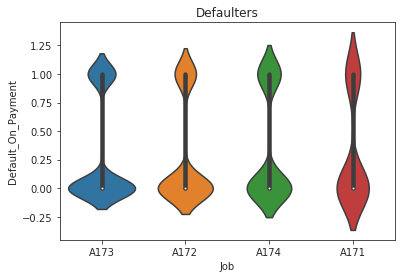

In [42]:
sns.set_style('ticks')
sns.violinplot(loan_df.Job, loan_df.Default_On_Payment)
plt.title('Defaulters')
plt.show()

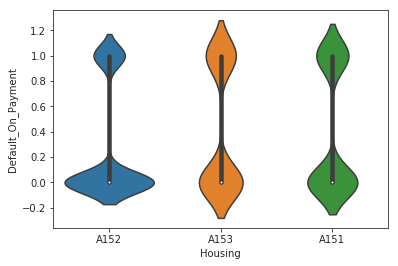

In [43]:
sns.violinplot(loan_df.Housing, loan_df.Default_On_Payment)

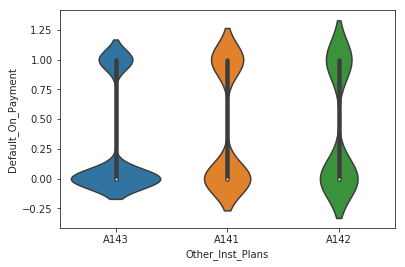

Other_Inst_Plans  Default_On_Payment
A141              0                     0.589928
                  1                     0.410072
A142              0                     0.595745
                  1                     0.404255
A143              0                     0.726044
                  1                     0.273956
Name: Default_On_Payment, dtype: float64

In [44]:
sns.violinplot(loan_df['Other_Inst_Plans'], loan_df.Default_On_Payment)
plt.show()

loan_df.groupby(['Other_Inst_Plans'])['Default_On_Payment'].value_counts(normalize=True)

In [45]:
'Other_Inst_Plans' in loan_df.columns

True

In [46]:
loan_df.columns

Index(['Customer_ID', 'Marital_Status_Gender', 'Age', 'Dependents', 'Housing',
       'Telephone', 'Property', 'Current_Address_Yrs', 'Job', 'Foreign_Worker',
       'Years_At_Present_Employment', 'Savings_Acc', 'Status_Checking_Acc',
       'Credit_History', 'Credit_Amount', 'Purposre_Credit_Taken',
       'Duration_in_Months', 'Inst_Rt_Income', 'Other_Debtors_Guarantors',
       'Other_Inst_Plans', 'Num_CC', 'Default_On_Payment', 'Count'],
      dtype='object')

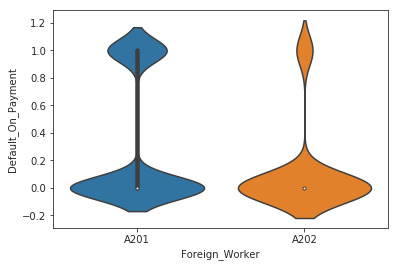

Foreign_Worker  Default_On_Payment
A201            0                     0.693666
                1                     0.306334
A202            0                     0.891892
                1                     0.108108
Name: Default_On_Payment, dtype: float64

In [47]:
sns.violinplot(loan_df.Foreign_Worker, loan_df.Default_On_Payment)
plt.show()

loan_df.groupby(['Foreign_Worker'])['Default_On_Payment'].value_counts(normalize=True)

In [48]:
loan_df.groupby(['Dependents'])['Default_On_Payment'].value_counts(normalize=True)

Dependents  Default_On_Payment
1           0                     0.700592
            1                     0.299408
2           0                     0.703226
            1                     0.296774
Name: Default_On_Payment, dtype: float64

In [49]:
loan_df.groupby(['Housing'])['Default_On_Payment'].value_counts(normalize=True)

Housing  Default_On_Payment
A151     0                     0.608939
         1                     0.391061
A152     0                     0.740533
         1                     0.259467
A153     0                     0.592593
         1                     0.407407
Name: Default_On_Payment, dtype: float64

In [50]:
loan_df.groupby(['Dependents'])['Default_On_Payment'].value_counts(normalize=True)

Dependents  Default_On_Payment
1           0                     0.700592
            1                     0.299408
2           0                     0.703226
            1                     0.296774
Name: Default_On_Payment, dtype: float64

In [51]:
loan_df.groupby(['Telephone'])['Default_On_Payment'].value_counts(normalize=True)

Telephone  Default_On_Payment
A191       0                     0.687919
           1                     0.312081
A192       0                     0.720297
           1                     0.279703
Name: Default_On_Payment, dtype: float64

Attribute 1: (Qualitative / Categorical) Status of existing checking account A11: ... < 0 USD A12: 0 <= ... < 10000 USD A13: ... >= 10000 USD A14: no checking account

In [52]:
loan_df.Status_Checking_Acc.replace(to_replace=['A11','A12','A13','A14'], value=['<0','>=0<10,000','>=10,000','None'], inplace=True)
loan_df.groupby('Status_Checking_Acc')['Default_On_Payment'].value_counts(normalize=True)

Status_Checking_Acc  Default_On_Payment
<0                   0                     0.507299
                     1                     0.492701
>=0<10,000           0                     0.613383
                     1                     0.386617
>=10,000             0                     0.777778
                     1                     0.222222
None                 0                     0.883249
                     1                     0.116751
Name: Default_On_Payment, dtype: float64